In [69]:
'''
Titanic: This data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to economic status (class), sex, age, survival and other variables. 
'''


'\nTitanic: This data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to economic status (class), sex, age, survival and other variables. \n'

In [80]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotnine

# Import the required package
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import seaborn as sns


In [71]:
# read and preview the data
titanic = pd.read_csv('titanic.csv')

#print head
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [72]:
# check data types
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [73]:
# check NA values
print(titanic['Survived'].unique())
print(titanic['Embarked'].unique())

[0 1]
['S' 'C' 'Q' nan]


In [74]:
titanic['Embarked'] = titanic.Embarked.fillna('Unknown')

In [75]:
# casting Survivied and Embarked as factor/category levels

# we will treat Survived [0,1] as a categorical var with factor levels dead ('0') and survived ('1')

# rename factor levels
titanic['Survived'] = pd.Categorical(titanic.Survived)
titanic['Embarked'] = pd.Categorical(titanic.Embarked)

# check if dtype is updated
print(titanic['Survived'].dtypes)

category


In [76]:
print(titanic.dtypes)

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


In [77]:
# create more meaningful categories or labels for Survived and Embarked
titanic['Survived'] = titanic['Survived'].cat.rename_categories(['Dead','Survived'])
titanic['Embarked'] = titanic['Embarked'].cat.rename_categories(['Southampton', 'Cherbourg', 'Queenstown', 'Unknown'])


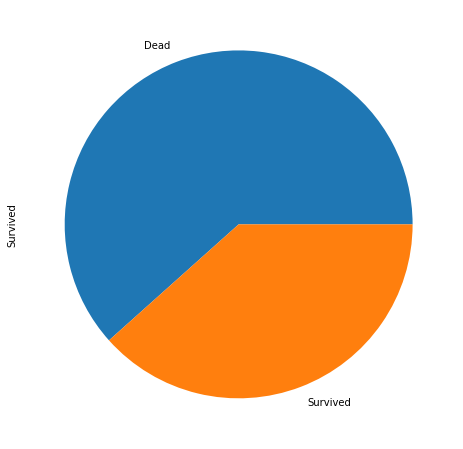

In [78]:
# check class distribution
# what are the portions of Survived and Dead people? Are they fairly balanced?

# Checking class distribution using pie chart
plt.figure(figsize=(12,8))
titanic['Survived'].value_counts().plot(kind='pie')
plt.show()

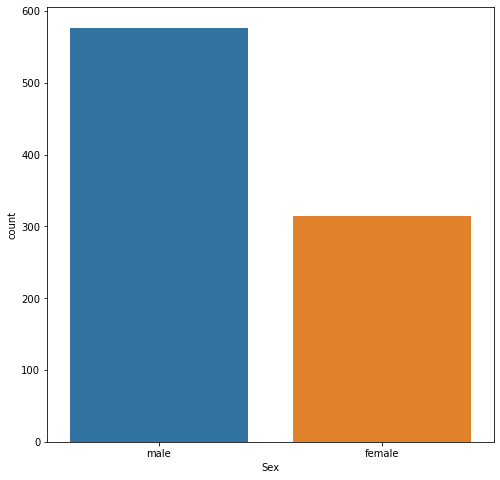

In [81]:
# Was there a significant difference between the population sizes of males and females aboard the Titanic?
plt.figure(figsize=(8,8))
sns.countplot(x="Sex" , data=titanic)
plt.show()

Survived  Dead  Survived
Sex                     
female      81       233
male       468       109


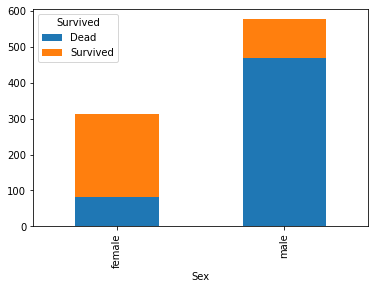

In [82]:
# Is Sex a good predictor?
# Let's plot Dead versus Survived segmented by Sex. Do we see a correlation between Sex and Survived?
titanic_plot = titanic.groupby(['Survived', 'Sex']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)
print (titanic_plot)
titanic_plot.plot(kind='bar', stacked=True)
plt.show()

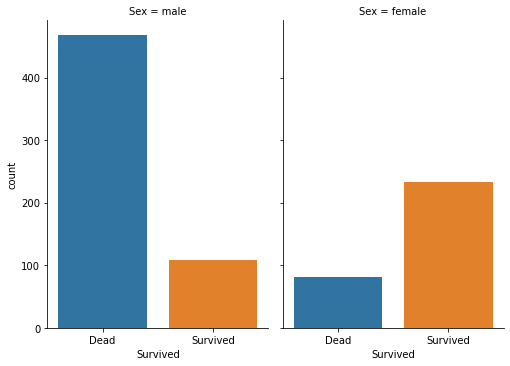

In [83]:
sns.catplot(x="Survived", col="Sex", data=titanic, kind="count", height=5, aspect=.7)
plt.show()

In [84]:
# is Age a good predictor?
# what are the age ranges and do we see a big difference in age for survivors versus non survivors?

print(titanic['Age'].describe())
titanic_dead = titanic['Survived']=='Dead'
print(titanic['Survived'].head())
print(titanic_dead.head())
print(titanic.where(titanic_dead, inplace=False)['Age'].describe())
titanic_survived = titanic['Survived']=='Survived'
print(titanic.where(titanic_survived, inplace=False)['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
0        Dead
1    Survived
2    Survived
3    Survived
4        Dead
Name: Survived, dtype: category
Categories (2, object): ['Dead', 'Survived']
0     True
1    False
2    False
3    False
4     True
Name: Survived, dtype: bool
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


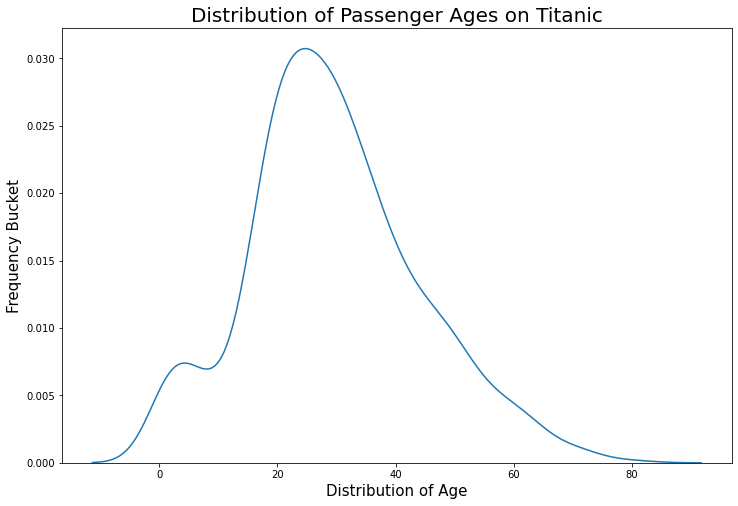

In [85]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=titanic, x="Age")
ax.set_xlabel('Distribution of Age',fontsize = 15)
ax.set_ylabel('Frequency Bucket',fontsize = 15)
ax.set_title('Distribution of Passenger Ages on Titanic',fontsize = 20)
plt.show()

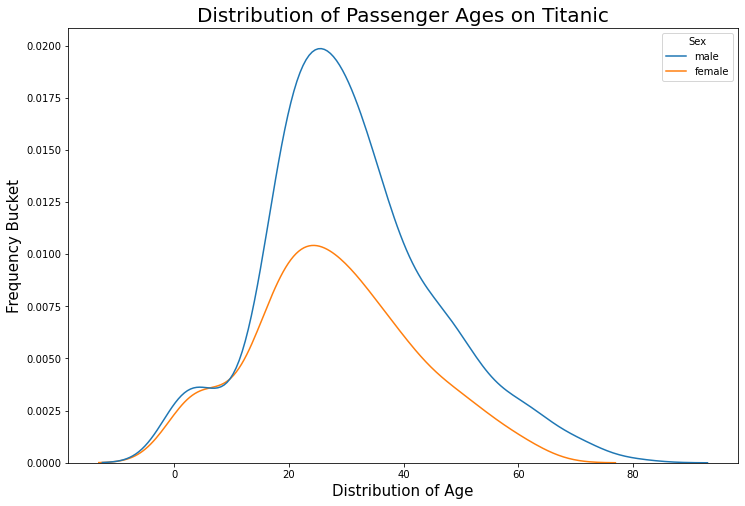

In [86]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=titanic, x="Age", hue='Sex')
ax.set_xlabel('Distribution of Age',fontsize = 15)
ax.set_ylabel('Frequency Bucket',fontsize = 15)
ax.set_title('Distribution of Passenger Ages on Titanic',fontsize = 20)
plt.show()

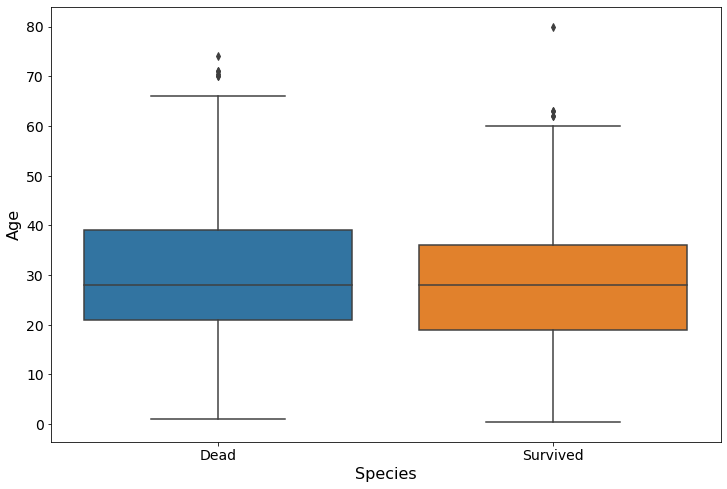

In [87]:
# Age on survivability
# Does Age have an impact on survivability?

# Age on survivability
plt.figure(figsize=(12,8))
# Seaborn boxplot
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.xlabel("Species", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

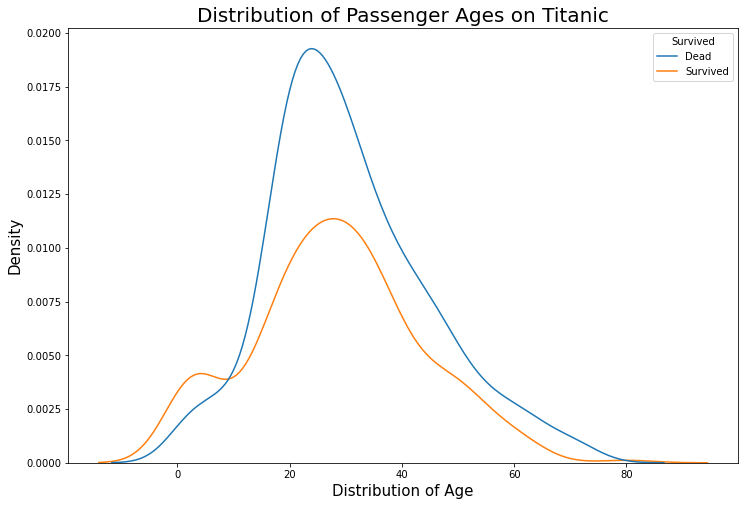

In [88]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=titanic, x="Age", hue='Survived')
ax.set_xlabel('Distribution of Age',fontsize = 15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title('Distribution of Passenger Ages on Titanic',fontsize = 20)
plt.show()